**Link :**


*   https://www.tensorflow.org/tutorials/keras/classification?hl=en



# Importing libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Version of Tensorflow
print(tf.__version__)


2.4.1


# Importing dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Explore  data

In [4]:
# 60,000 images in the training set, the images are 28 x 28 pixels.
train_images.shape

(60000, 28, 28)

In [5]:
# 600,000 labels in the learning set.
len(train_labels)

60000

In [6]:
# Each label is between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
#  10,000 images in the test set, the images are 28 x 28 pixels.
test_images.shape

(10000, 28, 28)

In [8]:
# 10,000 labels in the learning set.
len(test_labels)

10000

#Preprocess the data

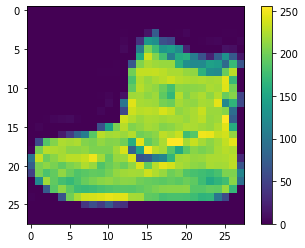

In [9]:
# The first image in the training set, the pixel values fall in the range of 0 to 255:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [10]:
# Scale these values to a range of 0 to 1 
train_images = train_images / 255.0

test_images = test_images / 255.0


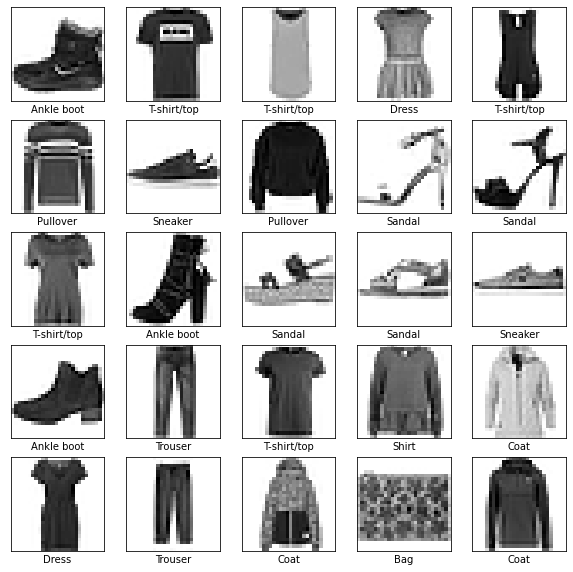

In [11]:
# Display 25 images for image training set, to verify that the data is in the correct format 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


#Build the model

In [12]:
# Set up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model

In [14]:
# Feed the model
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6259 - accuracy: 0.7790
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3820 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3341 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2896 - accuracy: 0.8937
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.8989
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2604 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2460 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

In [15]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3435 - accuracy: 0.8816

Test accuracy: 0.881600022315979


In [16]:
# Make predictions
# The model has predicted the label for each image in the testing set
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

# The first prediction
predictions[0]


array([3.1539221e-07, 1.2317764e-11, 1.8998620e-09, 5.4762432e-12,
       4.2425707e-10, 4.3232151e-04, 1.1631730e-06, 3.2123484e-02,
       2.9271824e-08, 9.6744275e-01], dtype=float32)

In [17]:
# Verify if the image corresponds to each of the 10 different articles of clothing
np.argmax(predictions[0])

9

In [18]:
# Examining the test label shows that this classification is correct
test_labels[0]

9

In [19]:
#Graph this to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


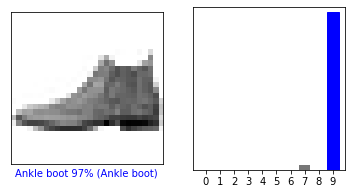

In [20]:
# Verify predictions for the first image
# Color correct predictions in blue and incorrect predictions in red and other predictions in gray.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


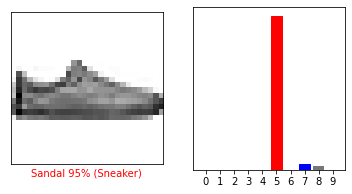

In [21]:
# Verify predictions for the thirteenth image
# Color correct predictions in blue and incorrect predictions in red and other predictions in gray.
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

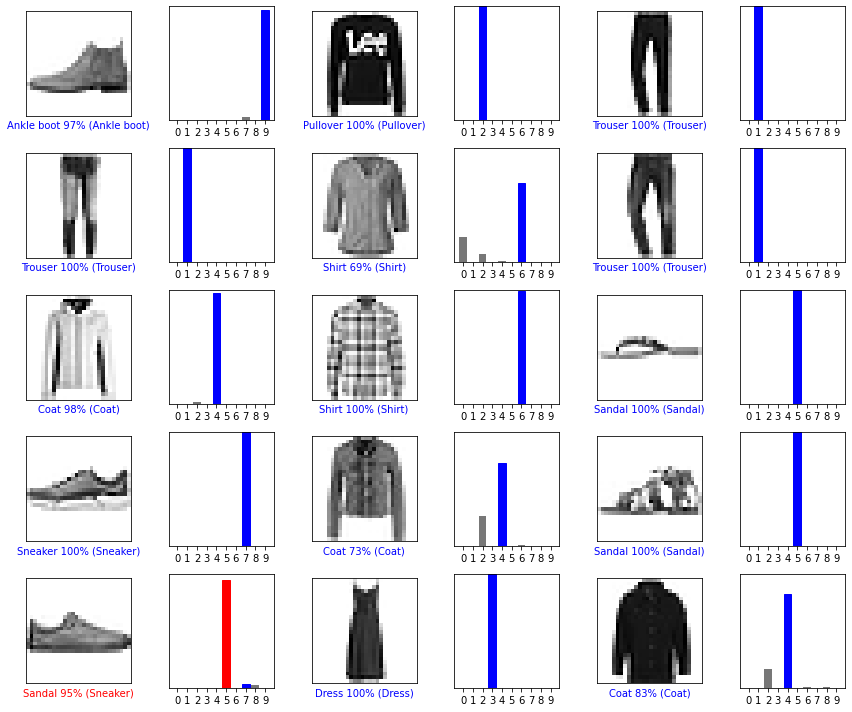

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red and other predictions in gray.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the trained model

In [23]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [24]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
# Predict the correct label for this image
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.7841893e-06 7.6468864e-15 9.9948955e-01 3.7584883e-12 4.6329157e-04
  1.2963812e-09 4.4362780e-05 1.1126392e-17 7.9117104e-09 2.1187949e-15]]


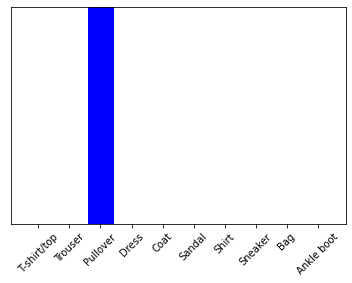

In [26]:
# Plot the test images, their predicted label, and the true label.
# Color correct predictions in blue and incorrect predictions in red and other predictions in gray.
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [ ]:
# Verify if the image corresponds to each of the 10 different articles of clothing
np.argmax(predictions_single[0])

#License


In [ ]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.